<a href="https://colab.research.google.com/github/BhagyaRekhaSunkavalli/AI-ML/blob/main/LSTM_Stock_Price_Prediction_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance pandas numpy matplotlib scikit-learn tensorflow

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [ ]:
ticker = 'AAPL'
data = yf.download(ticker, start='2015-01-01', end='2024-12-31')
data = data[['Close']]
data.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,AAPL
Date,
2015-01-02,24.288582
2015-01-05,23.604342
2015-01-06,23.606554
2015-01-07,23.937571
2015-01-08,24.857306


In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)


In [ ]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)


In [ ]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [ ]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - loss: 0.0177 - val_loss: 7.7841e-04
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0014 - val_loss: 7.2233e-04
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 0.0011 - val_loss: 7.7478e-04
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0010 - val_loss: 9.8712e-04
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0011 - val_loss: 0.0035
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 9.0678e-04 - val_loss: 0.0023
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 8.5879e-04 - val_loss: 0.0021
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 8.1221e-04 - val_loss: 6.3314e-04
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 7.5437e-04 - val_loss: 0.0017
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 7.7065e-04 - val_loss: 0.0021
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 8.1668e-04 - val_loss: 6.6283e-04
Epoch 12/20
62/

In [ ]:
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


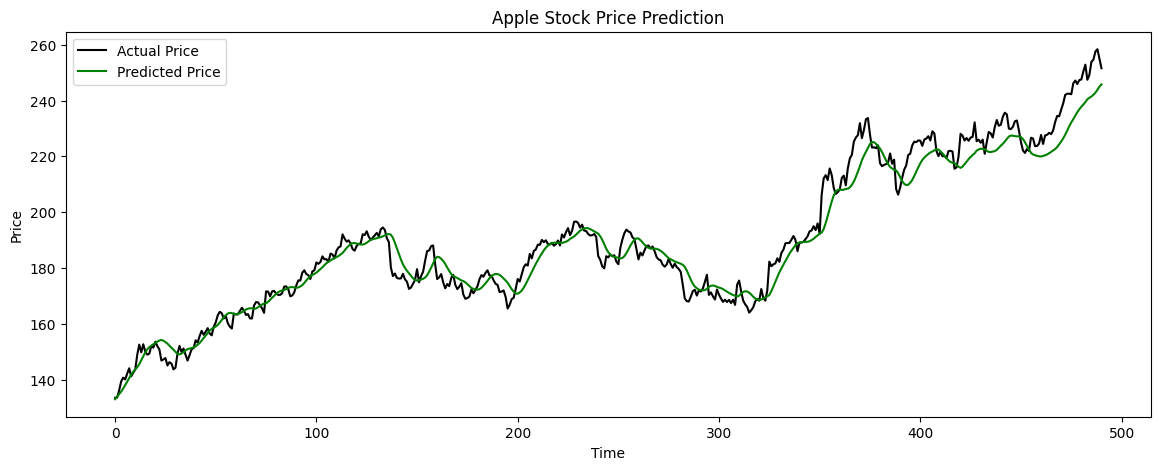

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(actual_prices, label='Actual Price', color='black')
plt.plot(predicted_prices, label='Predicted Price', color='green')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
